# Initial Clarifications about the Project:

This project focuses on the analysis and evaluation of Machine Learning and Data Analytics tools to determine the optimal models in predicting the profitability of stocks. 

It is essential to highlight:

The project does not aim to provide incentives or advice on stock investments.
Any investment, including ETFs, comes with risks. Before investing in an ETF, it's crucial to fully research and understand its characteristics and risks.
It's highly recommended to consult with a financial advisor or investment expert when exploring investment options.
Scope of the Analysis:

We will center our analysis on the opening and closing prices of stocks, as well as other relevant data available in our dataset. We will not consider external information, such as geopolitical, environmental factors, and others.

Objective of the Project:

The primary goal is to predict the profitability of exchange-traded funds, known as ETFs.

What are ETFs?

ETFs are investment funds that are traded on the stock exchange, similar to company stocks. Unlike a stock that represents ownership in a specific company, an ETF reflects a basket of assets, which can include stocks, bonds, commodities, among others.

Key Features of ETFs:

1.- Diversification: Investing in an ETF means diversifying across multiple assets. For example, an ETF that tracks the S&P 500 index offers exposure to the 500 companies that compose it.

2.- Liquidity: ETFs can be bought or sold on stock exchanges during market hours, just like stocks.

3.- Low Costs: Typically, ETFs have lower costs compared to other funds, as they often follow a passive approach.

4.- Flexibility: There are ETFs for various indices, sectors, markets, and more.

5.- Transparency: ETFs tend to be transparent, regularly publishing their assets.

Prediction Methodology:

We will identify the top 10 ETFs and analyze the stocks of the companies that compose them. From this, we aim to predict the individual profitability of these stocks, which will allow us to estimate the overall profitability of the corresponding ETF.

# Introduction 

**What are ETFs?**

ETFs are investment funds that are traded on the stock exchange, similar to company stocks. Unlike a stock that represents ownership in a specific company, an ETD reflects a basket of assets, which can include stocks, bonds, and commodities, among others.


In the ever-evolving world of finance, data analytics and machine learning have become indispensable tools for informed decision-making. In the pursuit of optimising investment strategies, this project embarks on a journey to harness the power of data to predict the profitability of Exchange-Traded Funds (ETSs).


The financial markets are complex ecosystems, where numerous factors influence the performance of assets. As a popular investment vehicle, ETFs offer exposure to diversified portfolios of assets, making them an attractive option for investors seeking a broad spectrum of market opportunities. However, the profitability of these ETFs is inherently tied to the individual stocks that constitute them.


Our exploration centres on the opening and closing prices of stocks, as well as other relevant data within our dataset. External influences, such as geopolitical or environmental factors, are intentionally excluded to focus solely on the internal dynamics of these financial assets.


This endeavour embodies the essence of data analytics leveraging the CRISP-DM methodology to systematically progress through the project phases, from understanding the business objectives to data preparation, modelling evaluation, and deployment. As we delve into this project, we recognize the critical importance of clear documentation, thorough evaluation, and continuous improvement to ensure that the results generated are not only insightful but also dependable.


# Business Understanding

The project involves a rigorous process of selecting and applying diverse machine-learning algorithms to historical stock market data. 
In the initial phase of the project, we seek a comprehensive understanding of the business objectives. 


To accomplish this, the project may involve tasks such as data preprocessing, feature selection, model training, and model evaluation. The performance of various models will be compared, and the one that exhibits the highest predictive accuracy and reliability in determining stock profitability will be identified as the optimal 


# Business Description 

- **Research question** 


How we develop a highly accurate predictive machine learning model for estimating the profitability of ETFs over a specified time period? 

- **General goal**


Our primary goal is to train the most effective predictive Machine Learning Model capable of estimating the profitability of ETFs over a specific time period. To achieve this, we will leverage historical data, feature engineering, and a range of machine learning algorithms, with a focus on regression models and potentially more advanced techniques like time series analysis.


# Data Understanding

Perform an initial assessment of the data to understand its structure, format, and general characteristics, verifying the data sources, data types, and the size of the dataset. Furthermore, examine summary statistics, including measures of central tendency and dispersion, to identify any unusual or extreme values where we visualize the data using charts or graphs to identify trends, patterns and potential inconsistencies

# Data Preparation 

Data preparation is a crucial phase in our project and it involves several key steps to ensure that the data is in a suitable format for analysis. Given our focus on predicting ETFS profitability, the following data preparation steps are essential. 
Historical data for ETFs is collected, including the opening and closing prices of stocks within these ETFs. We ensure data quality by checking for missing values, outliers, and data inconsistencies.


Data from various sources is combined into a unified dataset, aligning the timeframes and formats, and identifying the most relevant features or attributes for our analysis. In our case, these may include stock prices, profit return, and potentially other financial indicators. Data is normalized where necessary and create additional features that might be more informative for predicting profitability, such as moving averages, volatility measures, or relative strength indicators.


As we are dealing with time prediction, we ensure proper time-based splitting and validation techniques to account for temporal dependencies.
By meticulously preparing the data, we set the stage for creating accurate and reliable predictive models to estimate the profitability of the ETSs accurately.


# Modeling 

The modelling phase is the core of the project, where predictive models are used to estimate ETS profitability using regression and time series modelling techniques. In the selection of the models, two primary modelling techniques were used: Linear Regression and Time Series Analysis.


Develop a linear regression model using the training data. This model should aim to predict ETF profitability based on the selected stock-related features, considering their linear relationships.


Build a time series model using the training data. In this case, it captures the temporal patterns and seasonality of the ETS profitability, considering historical time-based data.


In [1]:
# We import all the libraries that we need in our analysis and we will import others as we need them.

import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset.

df_ETF = pd.read_excel('iShares_UnitedStates_Modified.xls')

In [3]:
df_ETF.head()

,Ticker,Name,SEDOL,ISIN,CUSIP,Incept. Date,Gross Expense Ratio (%),Net Expense Ratio (%),Net Assets (USD),Net Assets as of,...,Fixed Income Characteristics - Option Adjusted Spread,Fixed Income Characteristics - Avg. Yield (%),Fixed Income Characteristics - Avg. Yield as of Date,Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI ESG Fund Rating (AAA-CCC),Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI ESG Quality Score (0-10),Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI Weighted Average Carbon Intensity (Tons CO2E/$M SALES),Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI ESG % Coverage,Sustainability Characteristics (MSCI ESG Fund Ratings) - Sustainable Classification,Sustainability Characteristics (MSCI ESG Fund Ratings) - As of,Sustainability Characteristics (MSCI ESG Fund Ratings) - Based on holdings as of
0,IVV,iShares Core S&P 500 ETF,-,US4642872000,464287200,2000-05-15,0.03,0.03,3.421875e+11,2023-10-20,...,0.00682,-,-,A,6.6003,113.33,98.88,-,2023-09-21 00:00:00,2023-08-31 00:00:00
1,IEFA,iShares Core MSCI EAFE ETF,-,US46432F8427,46432F842,2012-10-18,0.07,0.07,9.263588e+10,2023-10-20,...,0.00013,-,-,AA,7.5536,106.96,99.7,-,2023-09-21 00:00:00,2023-08-31 00:00:00
2,AGG,iShares Core U.S. Aggregate Bond ETF,-,US4642872265,464287226,2003-09-22,0.03,0.03,8.885685e+10,2023-10-20,...,56.15833,5.74,2023-10-19 00:00:00,A,6.0752,271.14,66.92,-,2023-09-21 00:00:00,2023-08-31 00:00:00
3,IWF,iShares Russell 1000 Growth ETF,-,US4642876142,464287614,2000-05-22,0.19,0.19,6.885560e+10,2023-10-20,...,0.00214,-,-,A,6.6448,30.75,99.45,-,2023-09-21 00:00:00,2023-08-31 00:00:00
4,IEMG,iShares Core MSCI Emerging Markets ETF,-,US46434G1031,46434G103,2012-10-18,0.09,0.09,6.719045e+10,2023-10-20,...,0.00226,-,-,BBB,5.3425,337.9,95.65,-,2023-09-21 00:00:00,2023-08-31 00:00:00


In [4]:
# Columns of interest
columns_selected = [
    "Ticker", 
    "Name", 
    "Gross Expense Ratio (%)", 
    "Avg. Annual Return: Price Monthly - 1Y (%)",
    "Avg. Annual Return: Price Monthly - 3Y (%)",
    "Avg. Annual Return: Price Monthly - 5Y (%)",
    "Avg. Annual Return: Price Monthly - 10Y (%)"
]

# New DataFrame
df_selected = df_ETF[columns_selected]
df_selected.head(-5)

,Ticker,Name,Gross Expense Ratio (%),Avg. Annual Return: Price Monthly - 1Y (%),Avg. Annual Return: Price Monthly - 3Y (%),Avg. Annual Return: Price Monthly - 5Y (%),Avg. Annual Return: Price Monthly - 10Y (%)
0,IVV,iShares Core S&P 500 ETF,0.03,21.691873,10.174129,9.896895,11.873788
1,IEFA,iShares Core MSCI EAFE ETF,0.07,25.2,5.23,3.05,4
2,AGG,iShares Core U.S. Aggregate Bond ETF,0.03,0.54,-5.21,0.08,1.09
3,IWF,iShares Russell 1000 Growth ETF,0.19,27.457088,7.796373,12.204825,14.26745
4,IEMG,iShares Core MSCI Emerging Markets ETF,0.09,13.37,-0.89,1.06,2.29
...,...,...,...,...,...,...,...
421,ITDC,iShares® LifePath® Target Date 2035 ETF,0.10,-,-,-,-
422,ITDD,iShares® LifePath® Target Date 2040 ETF,0.11,-,-,-,-
423,IBIJ,iShares® iBonds® Oct 2033 Term TIPS ETF,0.10,-,-,-,-
424,ITDE,iShares® LifePath® Target Date 2045 ETF,0.11,-,-,-,-


In [5]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Ticker                                       431 non-null    object 
 1   Name                                         431 non-null    object 
 2   Gross Expense Ratio (%)                      431 non-null    float64
 3   Avg. Annual Return: Price Monthly - 1Y (%)   431 non-null    object 
 4   Avg. Annual Return: Price Monthly - 3Y (%)   431 non-null    object 
 5   Avg. Annual Return: Price Monthly - 5Y (%)   431 non-null    object 
 6   Avg. Annual Return: Price Monthly - 10Y (%)  431 non-null    object 
dtypes: float64(1), object(6)
memory usage: 23.7+ KB


In [6]:
df_selected.describe()

,Gross Expense Ratio (%)
count,431.000000
mean,0.324594
std,0.223217
min,0.030000
25%,0.150000
50%,0.300000
75%,0.470000
max,1.470000


In [7]:
null_counts = df_selected.isnull().sum()
null_counts

Ticker                                         0
Name                                           0
Gross Expense Ratio (%)                        0
Avg. Annual Return: Price Monthly - 1Y (%)     0
Avg. Annual Return: Price Monthly - 3Y (%)     0
Avg. Annual Return: Price Monthly - 5Y (%)     0
Avg. Annual Return: Price Monthly - 10Y (%)    0
dtype: int64

Before moving forward, it's important to note that, when inspecting the DataFrame using the df_selected.head(-5) code, we identified the presence of "-" values. These values can be interpreted as "0" or alternatively, as "NaN".

Although we expect these columns to contain only numeric values, we haven't yet confirmed if there are other distinct values apart from "-".

Given this scenario, the code null_counts = df_selected.isnull().sum() wouldn't provide us with an accurate detection of null values, since "-" is not recognized as a null value by default in Pandas.

To address this situation, we will proceed with the following code, the detailed explanation of which will be provided subsequently:

Function definition of is_number(s):

This function aims to verify if a value (represented by the variable "s") is numeric.
Inside the function, it tries to convert "s" into a floating-point number using float(s).
If the conversion is successful, it means that "s" is numeric, and the function returns True.
If the conversion throws a ValueError, it means that "s" is not numeric, and the function returns False.

Function definition of non_numeric_counts(series):

This function aims to count the non-numeric values in a Pandas series.
It uses a list comprehension to iterate over each item in the series. For every item that is not null (pd.isnull(item)) or is not numeric (is_number(item)), it adds 1 to the count.
The function returns the total number of non-numeric values in the series.

Function application:

The line non_numeric_counts = df_selected.apply(non_numeric_counts) applies the non_numeric_counts function to each column of the DataFrame df_selected. As a result, we get a series where the index is the column name, and the value is the count of non-numeric entries in that column.

The code provides a robust method to count non-numeric values in each column of our DataFrame. Essentially, it tries to convert each value into a number, and if the conversion fails, it considers it as a non-numeric value.

In [8]:
# Non-Numeric
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def non_numeric_counts(series):
    return sum(1 for item in series if not (pd.isnull(item) or is_number(item)))

non_numeric_counts = df_selected.apply(non_numeric_counts)

non_numeric_counts

Ticker                                         431
Name                                           431
Gross Expense Ratio (%)                          0
Avg. Annual Return: Price Monthly - 1Y (%)      43
Avg. Annual Return: Price Monthly - 3Y (%)      80
Avg. Annual Return: Price Monthly - 5Y (%)     128
Avg. Annual Return: Price Monthly - 10Y (%)    205
dtype: int64

After executing our code, we've identified the presence of non-numeric values within our columns. These will be replaced by "NaN".

Why do we choose "NaN" over "0"?

The decision to replace non-numeric values with "NaN" stems from the numeric nature of the columns. Should we opt for "0", it might introduce distortions into our analysis, creating outlier values that don't faithfully represent our data.

In [9]:
# Replace "-" values with "NaN"
df_selected = df_selected.replace("-", float('NaN'))

df_selected.head(-5)

,Ticker,Name,Gross Expense Ratio (%),Avg. Annual Return: Price Monthly - 1Y (%),Avg. Annual Return: Price Monthly - 3Y (%),Avg. Annual Return: Price Monthly - 5Y (%),Avg. Annual Return: Price Monthly - 10Y (%)
0,IVV,iShares Core S&P 500 ETF,0.03,21.691873,10.174129,9.896895,11.873788
1,IEFA,iShares Core MSCI EAFE ETF,0.07,25.200000,5.230000,3.050000,4.000000
2,AGG,iShares Core U.S. Aggregate Bond ETF,0.03,0.540000,-5.210000,0.080000,1.090000
3,IWF,iShares Russell 1000 Growth ETF,0.19,27.457088,7.796373,12.204825,14.267450
4,IEMG,iShares Core MSCI Emerging Markets ETF,0.09,13.370000,-0.890000,1.060000,2.290000
...,...,...,...,...,...,...,...
421,ITDC,iShares® LifePath® Target Date 2035 ETF,0.10,NaN,NaN,NaN,NaN
422,ITDD,iShares® LifePath® Target Date 2040 ETF,0.11,NaN,NaN,NaN,NaN
423,IBIJ,iShares® iBonds® Oct 2033 Term TIPS ETF,0.10,NaN,NaN,NaN,NaN
424,ITDE,iShares® LifePath® Target Date 2045 ETF,0.11,NaN,NaN,NaN,NaN


After running the code again, we can confirm that there are no longer any non-numeric values. These have been replaced, leaving non-numeric values only in the columns where they are appropriate.

In [10]:
# Non-Numeric
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def non_numeric_counts(series):
    return sum(1 for item in series if not (pd.isnull(item) or is_number(item)))

non_numeric_counts = df_selected.apply(non_numeric_counts)

non_numeric_counts

Ticker                                         431
Name                                           431
Gross Expense Ratio (%)                          0
Avg. Annual Return: Price Monthly - 1Y (%)       0
Avg. Annual Return: Price Monthly - 3Y (%)       0
Avg. Annual Return: Price Monthly - 5Y (%)       0
Avg. Annual Return: Price Monthly - 10Y (%)      0
dtype: int64

In [11]:
df_selected.describe()

,Gross Expense Ratio (%),Avg. Annual Return: Price Monthly - 1Y (%),Avg. Annual Return: Price Monthly - 3Y (%),Avg. Annual Return: Price Monthly - 5Y (%),Avg. Annual Return: Price Monthly - 10Y (%)
count,431.000000,388.000000,351.000000,303.000000,226.000000
mean,0.324594,12.786422,4.324097,3.651605,5.036953
std,0.223217,13.007914,9.462284,4.402681,4.817551
min,0.030000,-49.260000,-23.070000,-7.150000,-7.548510
25%,0.150000,4.217500,-1.460000,0.845000,1.500000
50%,0.300000,11.211000,3.400000,2.992600,4.005000
75%,0.470000,20.377964,9.345755,6.480000,8.422788
max,1.470000,81.820000,59.538662,21.998164,23.140869


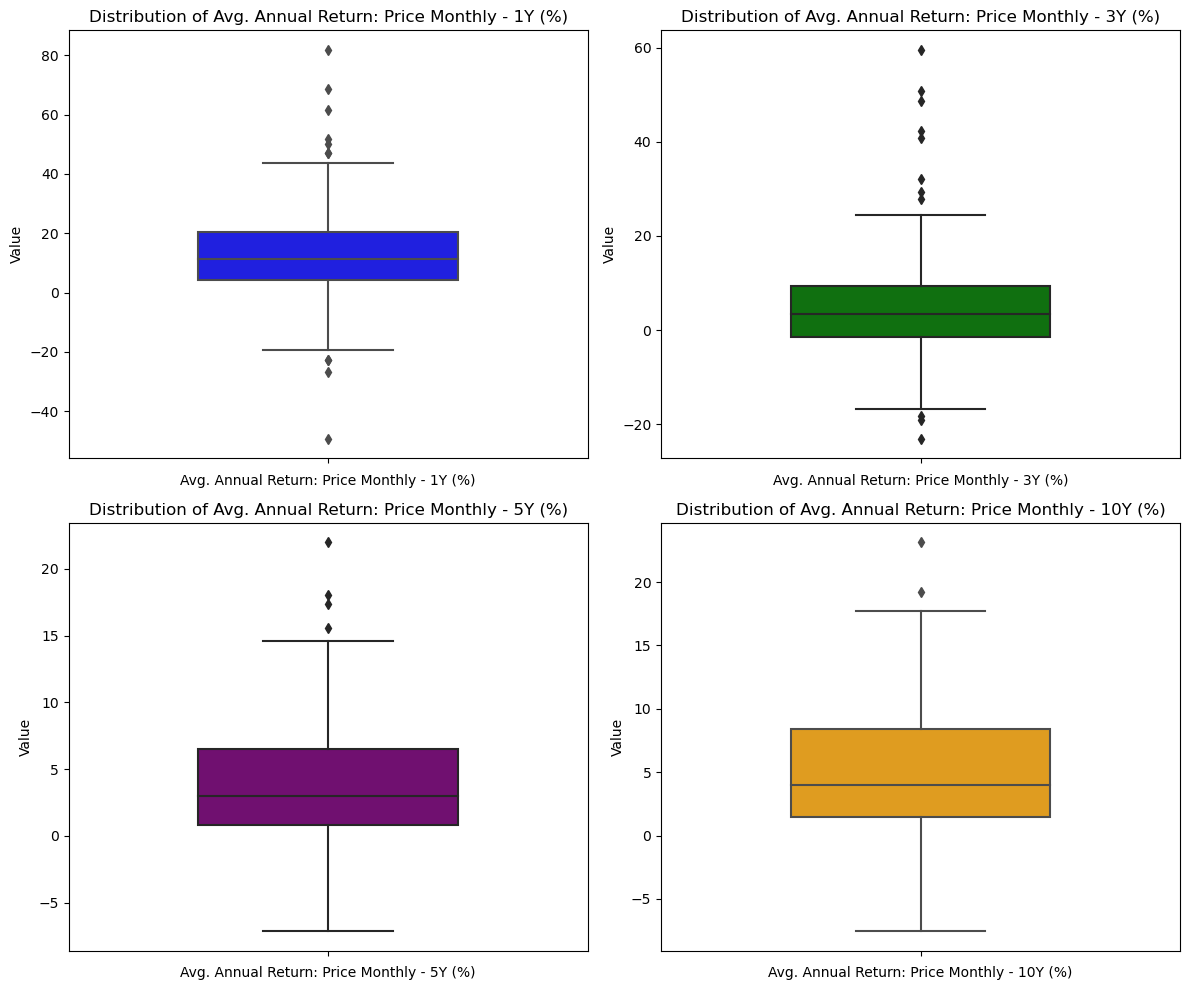

In [12]:
# Boxplots

# Columns selected
selected_returns = [
    "Avg. Annual Return: Price Monthly - 1Y (%)",
    "Avg. Annual Return: Price Monthly - 3Y (%)",
    "Avg. Annual Return: Price Monthly - 5Y (%)",
    "Avg. Annual Return: Price Monthly - 10Y (%)"
]

colors = ['blue', 'green', 'purple', 'orange']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for ax, column, color in zip(axes.flatten(), selected_returns, colors):
    sns.boxplot(y=df_selected[column].dropna().astype(float), color=color, ax=ax, width=0.5)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Value')
    ax.grid(False)

plt.tight_layout()
plt.show()

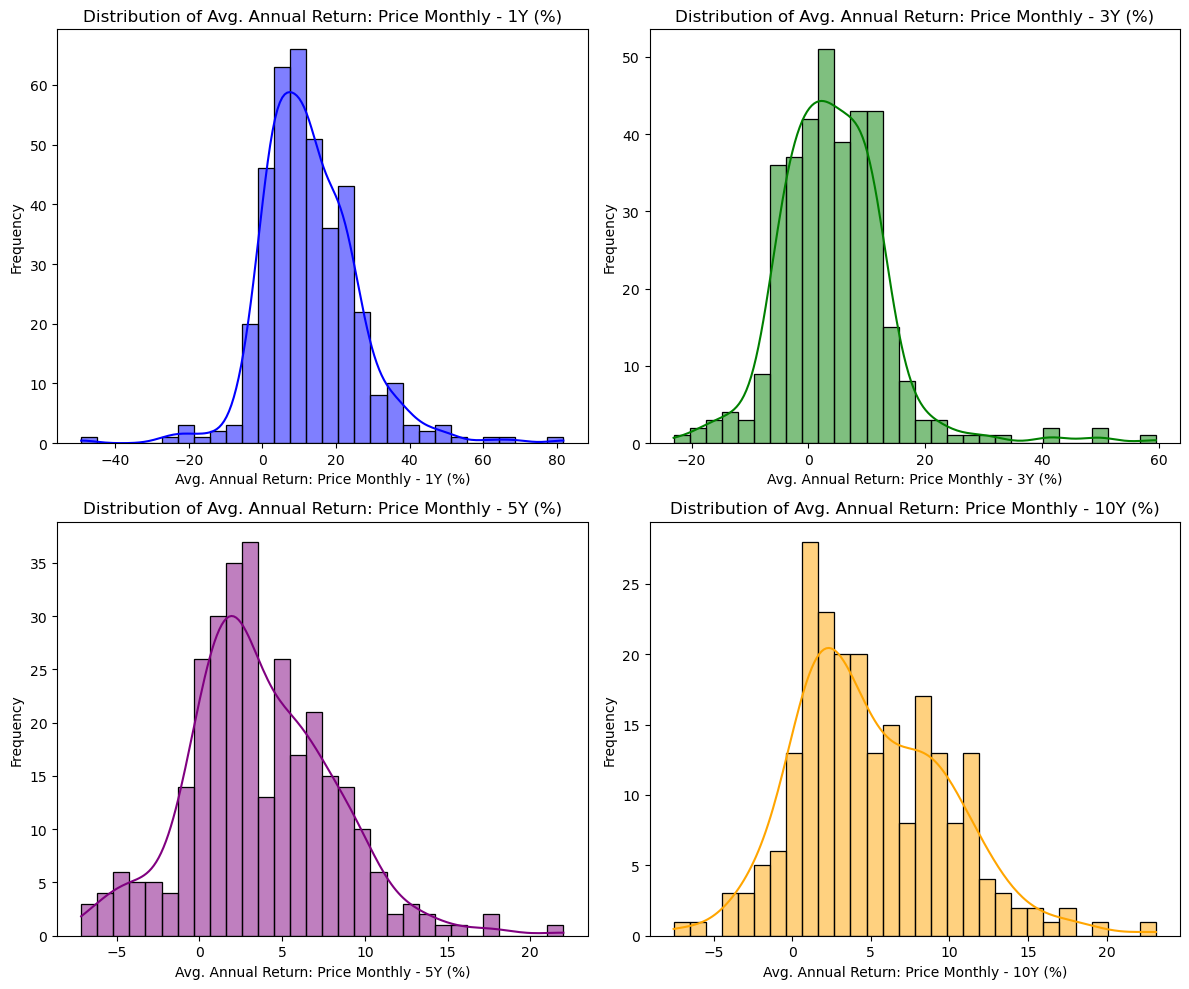

In [13]:
# Histogram

colors = ['blue', 'green', 'purple', 'orange']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for ax, column, color in zip(axes.flatten(), selected_returns, colors):
    sns.histplot(df_selected[column].dropna().astype(float), bins=30, kde=True, 
                 color=color, edgecolor='black', ax=ax)    
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)

plt.tight_layout()
plt.show()

Now that we have conducted a thorough exploration and cleansing of our data, our attention shifts to the analytical phase of our project.

Our next step is to identify the most effective approach for selecting the top 10 ETFs, focusing specifically on their respective returns.

The methodology we choose for calculating profitability is crucial and largely depends on the context of our analysis and the goals we aim to achieve.

For this particular scenario, we have decided to employ the concept of compound returns to guide our selection process. This approach takes into account the cumulative effect of returns over time, providing a more holistic and realistic assessment of the ETFs' performance.

Compound Return refers to the process where the interest or returns earned in one period also generate returns in subsequent periods. In other words, it's "interest on interest" or "return on return." It's a way to measure how an investment grows over time, taking into account the reinvestment of returns.

Imagine that you invest in an ETF that gives you a 10% return in the first year. If your initial investment was 100, at the end of the year you would have 110. If in the second year, the ETF gives you another 10% return, it is not calculated on the initial 100, but on the 110 you have at the beginning of the second year. Thus, at the end of the second year, you would have 121 and not just 120. This additional increase of 1 is the result of compound return.

The formula for compound return over n periods is:

(1+r1)×(1+r2)×…×(1+rn)−1

Where r1,r2,…,rn are the returns for each period.

In our case, for a particular ETF, the compound return over 10 years, considering the annual returns for 1 year, 3 years, 5 years, and 10 years, would be:

Compound Return = (1 + (r1y/100))^1 x (1 + (r3y/300))^3 x (1 + (r5y/500))^5 x (1 + (r10y/1000))^10


We will calculate the compound return for each ETF and then identify the "top 10" based on this metric.

In [14]:
# Compound return for each ETF
df_selected['Compound Return'] = (
    (1 + df_selected["Avg. Annual Return: Price Monthly - 1Y (%)"]/100) *
    (1 + df_selected["Avg. Annual Return: Price Monthly - 3Y (%)"]/300)**3 *
    (1 + df_selected["Avg. Annual Return: Price Monthly - 5Y (%)"]/500)**5 *
    (1 + df_selected["Avg. Annual Return: Price Monthly - 10Y (%)"]/1000)**10 - 1
) * 100

# Top 10 ETFs with compound return
top_10_compound = df_selected.sort_values(by='Compound Return', ascending=False).head(10)
top_10_compound[['Ticker', 'Name', 'Compound Return']]

,Ticker,Name,Compound Return
62,SOXX,iShares Semiconductor ETF,176.028032
282,TUR,iShares MSCI Turkey ETF,172.780553
170,IEO,iShares U.S. Oil & Gas Exploration & Productio...,137.105083
243,IEZ,iShares U.S. Oil Equipment & Services ETF,134.981197
137,ITB,iShares U.S. Home Construction ETF,134.956182
44,IYW,iShares U.S. Technology ETF,132.097753
148,IYE,iShares U.S. Energy ETF,116.931261
117,IXC,iShares Global Energy ETF,114.490077
101,IXN,iShares Global Tech ETF,112.274567
304,FILL,iShares MSCI Global Energy Producers ETF,105.930134


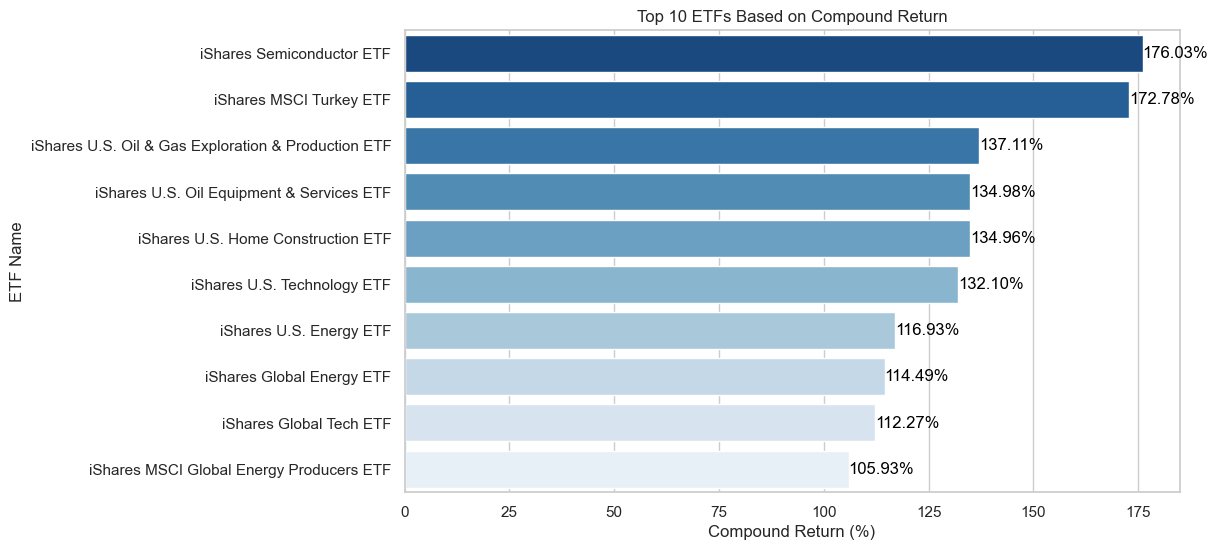

In [15]:
# Barplot
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Compound Return', y='Name', data=top_10_compound, palette='Blues_r')

for index, value in enumerate(top_10_compound['Compound Return']):
    plt.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center")

plt.title('Top 10 ETFs Based on Compound Return')
plt.xlabel('Compound Return (%)')
plt.ylabel('ETF Name')

plt.show()

In [16]:
# Top 10 ETFs based on 10-year returns
top_10_10_years = df_selected.sort_values(by="Avg. Annual Return: Price Monthly - 10Y (%)", ascending=False).head(10)
top_10_10_years[['Ticker', 'Name', 'Avg. Annual Return: Price Monthly - 10Y (%)']]

,Ticker,Name,Avg. Annual Return: Price Monthly - 10Y (%)
62,SOXX,iShares Semiconductor ETF,23.140869
44,IYW,iShares U.S. Technology ETF,19.191494
101,IXN,iShares Global Tech ETF,17.690000
105,IGM,iShares Expanded Tech Sector ETF,17.664976
80,IGV,iShares Expanded Tech-Software Sector ETF,16.448680
67,IWY,iShares Russell Top 200 Growth ETF,15.570100
222,SMIN,iShares MSCI India Small-Cap ETF,14.980000
3,IWF,iShares Russell 1000 Growth ETF,14.267450
137,ITB,iShares U.S. Home Construction ETF,13.972729
83,IHI,iShares U.S. Medical Devices ETF,13.712762


In [17]:
# Importing the dataset.

df_SOXX = pd.read_csv('SOXX_holdings_Modified.csv')

In [18]:
df_SOXX.head()

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date
0,AMD,ADVANCED MICRO DEVICES INC,Information Technology,Equity,"712,720,222.11",8.47,"712,720,222.11","7,010,133.00",101.67,United States,NASDAQ,USD,1,USD,-
1,AVGO,BROADCOM INC,Information Technology,Equity,"707,559,525.52",8.41,"707,559,525.52","803,032.00",881.11,United States,NASDAQ,USD,1,USD,-
2,NVDA,NVIDIA CORP,Information Technology,Equity,"655,640,551.59",7.79,"655,640,551.59","1,501,593.00",436.63,United States,NASDAQ,USD,1,USD,-
3,INTC,INTEL CORPORATION CORP,Information Technology,Equity,"567,706,991.40",6.75,"567,706,991.40","16,412,460.00",34.59,United States,NASDAQ,USD,1,USD,-
4,TXN,TEXAS INSTRUMENT INC,Information Technology,Equity,"504,187,420.88",5.99,"504,187,420.88","3,431,714.00",146.92,United States,NASDAQ,USD,1,USD,-


In [19]:
df_SOXX.shape

(35, 15)

In [20]:
df_SOXX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ticker           35 non-null     object 
 1   Name             35 non-null     object 
 2   Sector           35 non-null     object 
 3   Asset Class      35 non-null     object 
 4   Market Value     35 non-null     object 
 5   Weight (%)       35 non-null     float64
 6   Notional Value   35 non-null     object 
 7   Shares           35 non-null     object 
 8   Price            35 non-null     object 
 9   Location         35 non-null     object 
 10  Exchange         35 non-null     object 
 11  Currency         35 non-null     object 
 12  FX Rate          35 non-null     int64  
 13  Market Currency  35 non-null     object 
 14  Accrual Date     35 non-null     object 
dtypes: float64(1), int64(1), object(13)
memory usage: 4.2+ KB


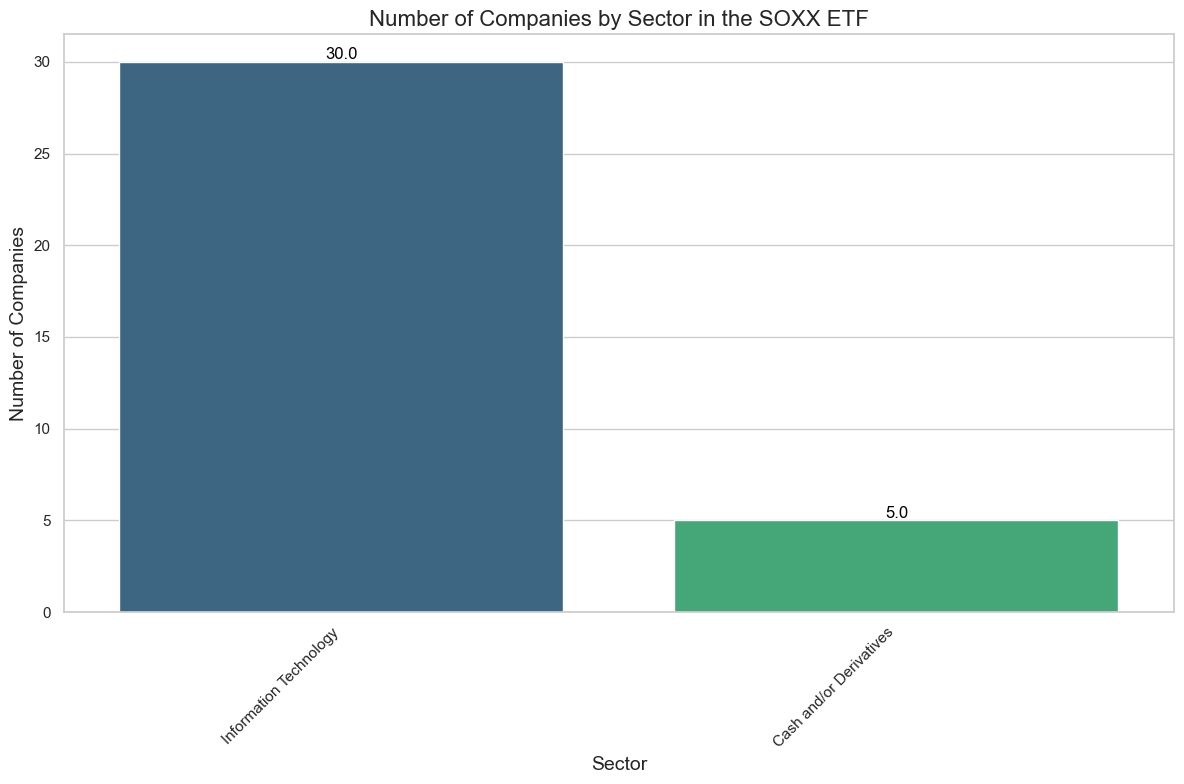

In [21]:
# Barplot Sector
sector_counts = df_SOXX['Sector'].value_counts()

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=sector_counts.index, y=sector_counts.values, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Number of Companies by Sector in the SOXX ETF', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

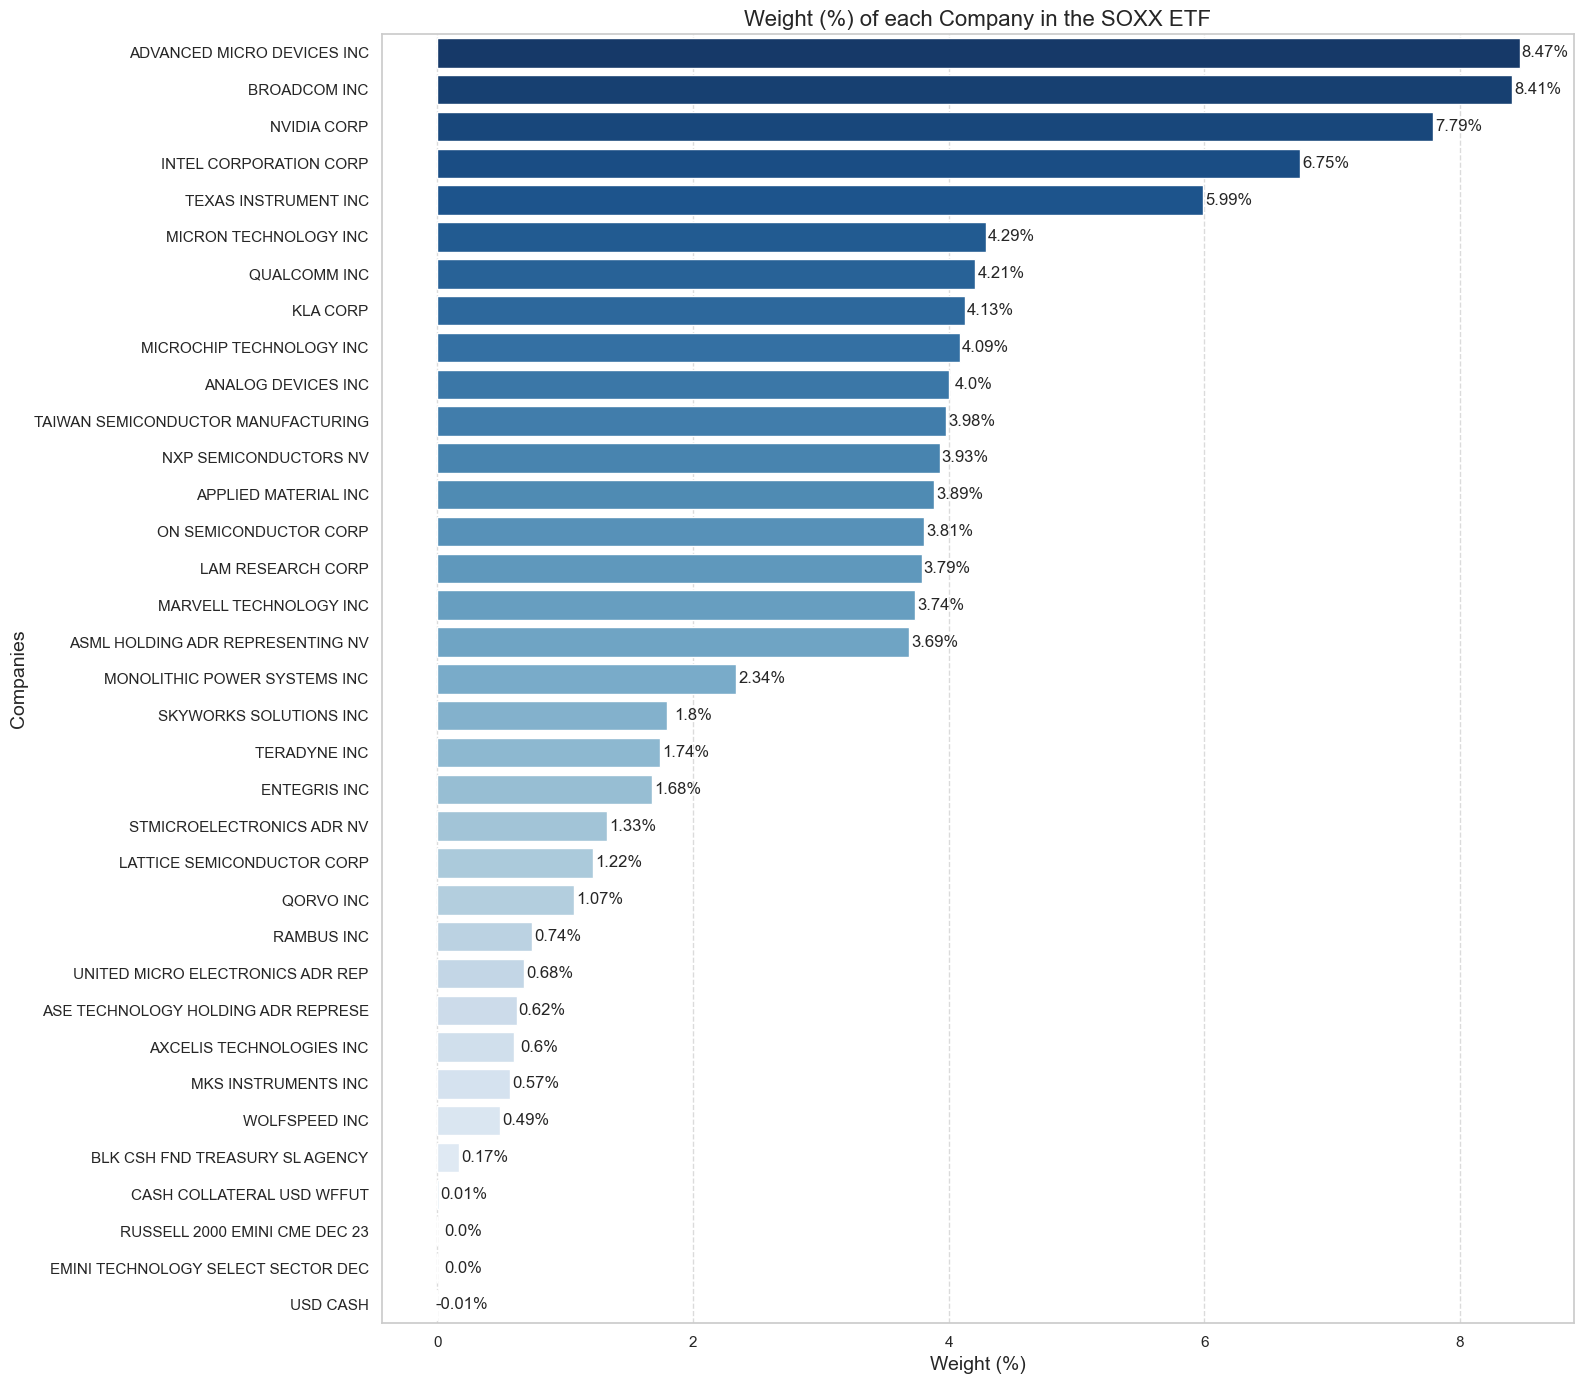

In [22]:
# Barplot Weight (%)

df_weight = df_SOXX[['Name', 'Weight (%)']].sort_values(by='Weight (%)', ascending=False)

plt.figure(figsize=(16, 14))
ax = sns.barplot(x='Weight (%)', y='Name', data=df_weight, palette='Blues_r')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.2, p.get_y() + p.get_height() / 2, f'{width}%', ha='center', va='center')

plt.title('Weight (%) of each Company in the SOXX ETF', fontsize=16)
plt.xlabel('Weight (%)', fontsize=14)
plt.ylabel('Companies', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [23]:
# Importing the dataset.

df_SOXX_stocks = pd.read_excel('SOXX_holding_stocks.xlsx')

In [24]:
df_SOXX_stocks.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Ticker,Name
0,2005-02-25,35.36,35.36,33.96,35.12,283990,0,ACLS,AXCELIS TECHNOLOGIES INC
1,2005-02-28,35.00,36.08,34.28,34.40,185515,0,ACLS,AXCELIS TECHNOLOGIES INC
2,2005-03-01,34.64,35.92,34.60,35.52,155093,0,ACLS,AXCELIS TECHNOLOGIES INC
3,2005-03-02,35.56,35.80,34.60,35.08,140085,0,ACLS,AXCELIS TECHNOLOGIES INC
4,2005-03-03,35.28,35.44,33.52,34.56,135703,0,ACLS,AXCELIS TECHNOLOGIES INC


In [25]:
df_SOXX_stocks.shape

(142977, 9)

In [26]:
df_SOXX_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142977 entries, 0 to 142976
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Date     142977 non-null  datetime64[ns]
 1   Open     142977 non-null  float64       
 2   High     142977 non-null  float64       
 3   Low      142977 non-null  float64       
 4   Close    142977 non-null  float64       
 5   Volume   142977 non-null  int64         
 6   OpenInt  142977 non-null  int64         
 7   Ticker   142977 non-null  object        
 8   Name     142977 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 9.8+ MB


In [27]:
null_counts_stocks = df_SOXX_stocks.isnull().sum()
null_counts_stocks

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
Ticker     0
Name       0
dtype: int64

In [28]:
df_SOXX_stocks.describe()

,Open,High,Low,Close,Volume,OpenInt
count,142977.000000,142977.000000,142977.000000,142977.000000,1.429770e+05,142977.0
mean,19.907021,20.213916,19.586799,19.905984,1.204015e+07,0.0
std,23.751549,24.007840,23.468734,23.755563,2.175784e+07,0.0
min,0.007910,0.007910,0.007910,0.007910,0.000000e+00,0.0
25%,5.450000,5.560200,5.328100,5.450000,1.438234e+06,0.0
50%,13.338000,13.583000,13.080000,13.333000,4.163423e+06,0.0
75%,25.224000,25.667000,24.776000,25.215000,1.335720e+07,0.0
max,278.300000,281.800000,270.030000,277.530000,7.079309e+08,0.0


Data Preparation

In [29]:
# 1. Verificar Duplicados
duplicates = df_SOXX_stocks[df_SOXX_stocks.duplicated()]
duplicates

,Date,Open,High,Low,Close,Volume,OpenInt,Ticker,Name


In [30]:
#Convertir la Columna 'Date' a Formato de Fecha
df_SOXX_stocks['Date'] = pd.to_datetime(df_SOXX_stocks['Date'])

In [31]:
# 2. Ordenar los Datos por Fecha y Empresa
df_SOXX_stocks_sorted = df_SOXX_stocks.sort_values(by=['Ticker', 'Date'])
df_SOXX_stocks_sorted

,Date,Open,High,Low,Close,Volume,OpenInt,Ticker,Name
0,2005-02-25,35.36,35.36,33.96,35.12,283990,0,ACLS,AXCELIS TECHNOLOGIES INC
1,2005-02-28,35.00,36.08,34.28,34.40,185515,0,ACLS,AXCELIS TECHNOLOGIES INC
2,2005-03-01,34.64,35.92,34.60,35.52,155093,0,ACLS,AXCELIS TECHNOLOGIES INC
3,2005-03-02,35.56,35.80,34.60,35.08,140085,0,ACLS,AXCELIS TECHNOLOGIES INC
4,2005-03-03,35.28,35.44,33.52,34.56,135703,0,ACLS,AXCELIS TECHNOLOGIES INC
...,...,...,...,...,...,...,...,...,...
142972,2017-11-06,2.54,2.55,2.54,2.55,247481,0,UMC,UNITED MICRO ELECTRONICS ADR REP
142973,2017-11-07,2.55,2.57,2.53,2.53,379809,0,UMC,UNITED MICRO ELECTRONICS ADR REP
142974,2017-11-08,2.55,2.55,2.53,2.55,208356,0,UMC,UNITED MICRO ELECTRONICS ADR REP
142975,2017-11-09,2.58,2.60,2.56,2.58,1372819,0,UMC,UNITED MICRO ELECTRONICS ADR REP


In [32]:
# 3. Verificar Datos Inconsistentes o Anómalos
# Para este paso, vamos a verificar si hay precios de cierre negativos o iguales a cero, lo cual sería anómalo para datos de acciones.
anomalous_data = df_SOXX_stocks_sorted[df_SOXX_stocks_sorted['Close'] <= 0]
anomalous_data

,Date,Open,High,Low,Close,Volume,OpenInt,Ticker,Name


Daily Portfolio Return

Daily return of each share

In [33]:
# 1. Cálculo de la Rentabilidad Diaria de Cada Acción
df_SOXX_stocks_sorted['Daily_Return'] = df_SOXX_stocks_sorted.groupby('Ticker')['Close'].pct_change()

# Visualizar los primeros registros para verificar los cálculos
df_SOXX_stocks_sorted.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Ticker,Name,Daily_Return
0,2005-02-25,35.36,35.36,33.96,35.12,283990,0,ACLS,AXCELIS TECHNOLOGIES INC,NaN
1,2005-02-28,35.00,36.08,34.28,34.40,185515,0,ACLS,AXCELIS TECHNOLOGIES INC,-0.020501
2,2005-03-01,34.64,35.92,34.60,35.52,155093,0,ACLS,AXCELIS TECHNOLOGIES INC,0.032558
3,2005-03-02,35.56,35.80,34.60,35.08,140085,0,ACLS,AXCELIS TECHNOLOGIES INC,-0.012387
4,2005-03-03,35.28,35.44,33.52,34.56,135703,0,ACLS,AXCELIS TECHNOLOGIES INC,-0.014823


In [34]:
# 2. Cálculo de la Rentabilidad Diaria Promedio del Portafolio
# Agrupar por fecha y calcular la media de las rentabilidades diarias de todas las acciones
portfolio_daily_return = df_SOXX_stocks_sorted.groupby('Date')['Daily_Return'].mean()

# Convertir el resultado a un DataFrame para mejor visualización
portfolio_daily_return_df = portfolio_daily_return.reset_index()

# Mostrar los primeros registros para verificar los cálculos
portfolio_daily_return_df.head()

,Date,Daily_Return
0,1972-01-07,NaN
1,1972-01-14,-0.503141
2,1972-01-21,0.000000
3,1972-01-24,0.000000
4,1972-01-25,0.000000


In [35]:
# 1. Cálculo de la Rentabilidad Acumulada
portfolio_daily_return_df['Cumulative_Return'] = (1 + portfolio_daily_return_df['Daily_Return']).cumprod()

# Reemplazar los valores infinitos por NaN y luego imputar esos NaN con 1 (que representa 0% de rentabilidad acumulada)
portfolio_daily_return_df['Cumulative_Return'].replace([np.inf, -np.inf], np.nan, inplace=True)
portfolio_daily_return_df['Cumulative_Return'].fillna(1, inplace=True)

portfolio_daily_return_df.head()

,Date,Daily_Return,Cumulative_Return
0,1972-01-07,NaN,1.000000
1,1972-01-14,-0.503141,0.496859
2,1972-01-21,0.000000,0.496859
3,1972-01-24,0.000000,0.496859
4,1972-01-25,0.000000,0.496859


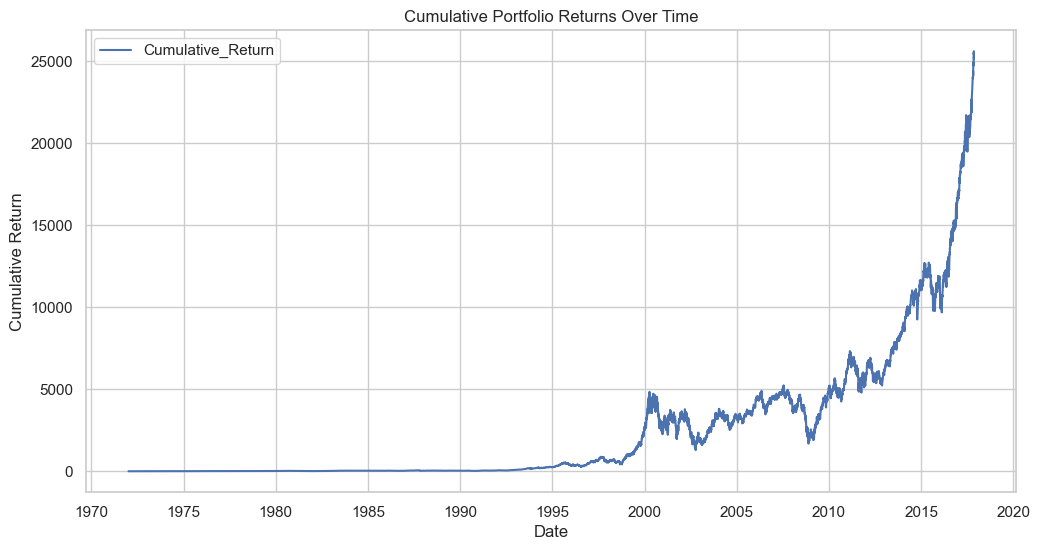

In [36]:
# Configuración del tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de la rentabilidad acumulada
plt.plot(portfolio_daily_return_df['Date'], portfolio_daily_return_df['Cumulative_Return'], label='Cumulative_Return')

plt.title('Cumulative Portfolio Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

plt.legend()

plt.grid(True)
plt.show()

Paso 3: Filtrar datos

In [37]:
#Filtrar los Datos para la Empresa AMD:
amd_data = df_SOXX_stocks_sorted[df_SOXX_stocks['Ticker'] == 'AMD']

# Filtrar por Fecha (Desde 2007 Hasta 2017):
amd_data_10_years = amd_data[(amd_data['Date'] >= '2007-01-01') & (amd_data['Date'] <= '2017-12-31')]

# Ordenar los Datos por Fecha:
amd_data_10_years = amd_data_10_years.sort_values(by='Date')

amd_data_10_years.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Ticker,Name,Daily_Return
25964,2007-01-03,20.08,20.40,19.35,19.52,28107900,0,AMD,ADVANCED MICRO DEVICES INC,-0.040786
25965,2007-01-04,19.66,19.86,19.32,19.79,23380300,0,AMD,ADVANCED MICRO DEVICES INC,0.013832
25966,2007-01-05,19.54,19.91,19.54,19.71,15772600,0,AMD,ADVANCED MICRO DEVICES INC,-0.004042
25967,2007-01-08,19.71,19.86,19.25,19.47,15814600,0,AMD,ADVANCED MICRO DEVICES INC,-0.012177
25968,2007-01-09,19.45,19.71,19.37,19.65,14098100,0,AMD,ADVANCED MICRO DEVICES INC,0.009245


In [38]:
# Cálculo de la Rentabilidad Acumulada
amd_data_10_years['Cumulative_Return'] = (1 + amd_data_10_years['Daily_Return']).cumprod()

In [39]:
amd_data_10_years.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Ticker,Name,Daily_Return,Cumulative_Return
25964,2007-01-03,20.08,20.40,19.35,19.52,28107900,0,AMD,ADVANCED MICRO DEVICES INC,-0.040786,0.959214
25965,2007-01-04,19.66,19.86,19.32,19.79,23380300,0,AMD,ADVANCED MICRO DEVICES INC,0.013832,0.972482
25966,2007-01-05,19.54,19.91,19.54,19.71,15772600,0,AMD,ADVANCED MICRO DEVICES INC,-0.004042,0.968550
25967,2007-01-08,19.71,19.86,19.25,19.47,15814600,0,AMD,ADVANCED MICRO DEVICES INC,-0.012177,0.956757
25968,2007-01-09,19.45,19.71,19.37,19.65,14098100,0,AMD,ADVANCED MICRO DEVICES INC,0.009245,0.965602


Paso 4: Creación e Identificacion de Variables Dependientes  y Variable Independiente para el Modelo

Rentabilidad acumulada a 10 años en el futuro. y = Variable Dependiente

Para poder calcular la rentabilidad acumulada a 10 anos en el futuro necesitamos desplazar la columna de rentabilidad acumulada 10 años hacia atrás en el tiempo. Sin embargo, dado que nuestros datos están en días y hay aproximadamente 252 días de trading en un año, necesitaremos desplazar la columna 2520 días (10 años * 252 días/año) hacia atrás.

Sin embargo, hay un aspecto importante a considerar ya que al desplazar los datos hacia atrás, las últimas 2520 filas de nuestro conjunto de datos no tendrán un valor de rentabilidad acumulada a 10 años porque estamos en el presente y no tenemos datos futuros para esos días. Como resultado, tendremos que eliminar esas filas de nuestro conjunto de datos o llenar esos valores de alguna manera, en este caso reemplazaremos los valores NaN con la Media.

In [40]:
amd_data_10_years['Cumulative_Return_10y'] = amd_data_10_years['Cumulative_Return'].shift(-2520)

In [41]:
amd_data_10_years.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Ticker,Name,Daily_Return,Cumulative_Return,Cumulative_Return_10y
25964,2007-01-03,20.08,20.40,19.35,19.52,28107900,0,AMD,ADVANCED MICRO DEVICES INC,-0.040786,0.959214,0.552334
25965,2007-01-04,19.66,19.86,19.32,19.79,23380300,0,AMD,ADVANCED MICRO DEVICES INC,0.013832,0.972482,0.556265
25966,2007-01-05,19.54,19.91,19.54,19.71,15772600,0,AMD,ADVANCED MICRO DEVICES INC,-0.004042,0.968550,0.564619
25967,2007-01-08,19.71,19.86,19.25,19.47,15814600,0,AMD,ADVANCED MICRO DEVICES INC,-0.012177,0.956757,0.562162
25968,2007-01-09,19.45,19.71,19.37,19.65,14098100,0,AMD,ADVANCED MICRO DEVICES INC,0.009245,0.965602,0.550369


In [42]:
# Reemplazar los valores NaN con la media
amd_data_10_years = amd_data_10_years.fillna(amd_data_10_years.mean())

In [43]:
# Split the dataset into X and y columns
features = ['Daily_Return', 'Cumulative_Return']
X = amd_data_10_years[features] # Independent variable 
y = amd_data_10_years['Cumulative_Return_10y'] # Dependent variable

X, y

(       Daily_Return  Cumulative_Return
 25964     -0.040786           0.959214
 25965      0.013832           0.972482
 25966     -0.004042           0.968550
 25967     -0.012177           0.956757
 25968      0.009245           0.965602
 ...             ...                ...
 28695      0.072842           0.586241
 28696      0.010059           0.592138
 28697     -0.028216           0.575430
 28698     -0.050384           0.546437
 28699      0.012590           0.553317
 
 [2736 rows x 2 columns],
 25964    0.552334
 25965    0.556265
 25966    0.564619
 25967    0.562162
 25968    0.550369
            ...   
 28695    0.623180
 28696    0.623180
 28697    0.623180
 28698    0.623180
 28699    0.623180
 Name: Cumulative_Return_10y, Length: 2736, dtype: float64)

Paso 5: División de los Datos

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

# 1. División de los Datos (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba para verificar
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2736, 2), (2736,), (2188, 2), (548, 2), (2188,), (548,))

In [45]:
# Estandarizar los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('Mean R^2 in Cross Validation CV Mean: ', np.mean(scores))
    print('Standard Deviation of R^2 in Cross Validation STD: ', np.std(scores))
    print('\n')

In [47]:
# Entrenar el Modelo de Regresión Lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = linear_model.predict(X_test_scaled)

# Calcular las métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
get_cv_scores(linear_model)

print('R^2:', r2)
print('Mean Square Error MSE:', mse)

Mean R^2 in Cross Validation CV Mean:  -0.0008656527421257332
Standard Deviation of R^2 in Cross Validation STD:  0.015083427325948503


R^2: -0.014176672089973197
Mean Square Error MSE: 0.0003068008509277524


Cross Validation

Media del R^2: Este valor está muy cercano a 0, lo que indica que el modelo no está haciendo un buen trabajo para predecir la rentabilidad acumulada a 10 años en el futuro. Un valor de R^2 cercano a 1 indicaría un modelo perfecto, mientras que un valor cercano a 0 o negativo indica un mal ajuste.


Desviación Estándar del R^2: Este valor es relativamente bajo, lo que indica que el rendimiento del modelo es bastante consistente a través de las diferentes particiones en la validación cruzada. Sin embargo, dado que la media del R^2 es casi cero, esta consistencia no es necesariamente algo positivo en este caso.

La deficiencia del modelo se puede deber a multiples factores pero en este caso un problema que podemos observar es que no tenemos suficientes caracteristicas dentro de nuestra data que nos ayuden a una mejor prediccion.

Para poder mejorar la prediccion vamos a crear y agregar algunos indicadores tecnicos que son comunmente utilizados en el analisis de acciones a nuestra data.

Indicadores Técnicos:

1. Simple Moving Average (SMA):

El SMA es el promedio de los precios de las acciones durante un período específico. Ayuda a suavizar las fluctuaciones diarias y resaltar tendencias a largo plazo.

Este se calcula sumando los precios de cierre de las acciones de los últimos 'n' días y dividimos entre 'n'. Por ejemplo, para un promedio móvil de 5 días, sumaríamos los precios de cierre de los últimos 5 días y dividirlos entre 5.

En este caso utilizaremos una ventana 5, 20 y 50 dias.

Esto nos ayuda a identificar la tendencia de un activo. Cuando los precios están por encima del SMA, podría indicar una tendencia alcista, y cuando están por debajo, una tendencia bajista.

2. RSI (Relative Strength Index):

El RSI es un indicador de análisis técnico utilizado para identificar condiciones de sobrecompra o sobreventa en un mercado financiero. El RSI es un oscilador que se mueve entre 0 y 100, y se utiliza comúnmente para evaluar la velocidad y el cambio de los movimientos de precio de un activo.

* Cómo se calcula el RSI:

2.1 - Cálculo de las Ganancias y Pérdidas Promedio: Para un período dado (comúnmente 14 días), calculamos el promedio de las ganancias y las pérdidas diarias. Las ganancias se cuentan solo si el precio de cierre de hoy es más alto que el precio de cierre de ayer, y las pérdidas se cuentan solo si es más bajo.

2.2 - Cálculo del RS (Relative Strength o Fuerza Relativa): Divide el promedio de ganancias entre el promedio de pérdidas.

2.3- Cálculo del RSI: 100 - (100 / 1 + RS)

* Interpretación del RSI:

Sobrecompra: Un RSI por encima de 70 indica condiciones de sobrecompra, sugiriendo que el precio del activo puede estar demasiado alto y podría haber una corrección a la baja.

Sobreventa: Un RSI por debajo de 30 indica condiciones de sobreventa, sugiriendo que el precio del activo puede estar demasiado bajo y podría haber un rebote al alza.

Señales de Compra/Venta: Algunos traders utilizan el RSI para identificar posibles puntos de reversión en el mercado. Por ejemplo, si el RSI se mueve desde la zona de sobreventa y cruza el nivel de 30 al alza, podría ser una señal de compra.

3. EMA (Exponential Moving Average)

El EMA es un tipo de media móvil que da más peso a los precios más recientes, con el objetivo de hacerla más sensible a los cambios de precios. A diferencia de la media móvil simple (SMA), que asigna el mismo peso a todos los precios, el EMA asigna más peso a los precios más recientes.

* Como se calcula el EMA:
EMA(hoy) = (Valor de cierre - EMA(ayer)) X Multiplicador + EMA(ayer)

Donde: Multiplicador = 2 / Periodo de tiempo +1

Por ejemplo, si estamos calculamos un EMA de 10 días(perido de tiempo), podemos usar la SMA de los primeros 10 días como el EMA del primer día.

4. MACD (Moving Average Convergence Divergence):

El MACD es un indicador de análisis técnico utilizado para identificar la dirección de la tendencia, la duración, la fuerza y los posibles puntos de reversión de un mercado financiero.

* Cómo se calcula el MACD:
MACD Line: Se calcula restando la media móvil exponencial (EMA) de 26 períodos de la EMA de 12 períodos.
MACD Line = EMA12 - EMA26

5. Signal Line
Es la EMA de 9 períodos de la línea MACD = EMA9(MACD Line)

* Interpretación del MACD:

.-Tendencia: Cuando la línea MACD está por encima de la Signal Line, se considera una señal alcista. Cuando está por debajo, es una señal bajista.

.-Cruces: Un cruce de la línea MACD por encima de la Signal Line puede ser interpretado como una señal de compra, mientras que un cruce por debajo puede ser una señal de venta.

.-Divergencia: Cuando el precio de un activo está haciendo nuevos máximos o mínimos, pero el MACD no lo está, puede indicar una debilidad en la tendencia y una posible reversión.

6. Volatilidad:

La volatilidad es una medida estadística que describe la dispersión o variabilidad de los retornos de un activo financiero. En los mercados financieros, la volatilidad se utiliza comúnmente para cuantificar el riesgo asociado con la inversión en un activo particular.

La volatilidad se mide comúnmente como la desviación estándar de los retornos del activo. Una desviación estándar alta indica que los retornos son más dispersos y, por lo tanto, el activo es más volátil.

En este caso calculamos la volatilidad como la desviación estándar de los rendimientos diarios de las acciones durante un período específico (20 dias).

In [48]:
# 1. SMA 
amd_data_10_years['SMA_5'] = amd_data_10_years['Close'].rolling(window=5).mean()
amd_data_10_years['SMA_20'] = amd_data_10_years['Close'].rolling(window=20).mean()
amd_data_10_years['SMA_50'] = amd_data_10_years['Close'].rolling(window=50).mean()

# 2. RSI
delta = amd_data_10_years['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
amd_data_10_years['RSI'] = 100 - (100 / (1 + rs))

# 3. EMA
amd_data_10_years['EMA_12'] = amd_data_10_years['Close'].ewm(span=12, adjust=False).mean()
amd_data_10_years['EMA_26'] = amd_data_10_years['Close'].ewm(span=26, adjust=False).mean()

# 4. MACD
amd_data_10_years['MACD'] = amd_data_10_years['EMA_12'] - amd_data_10_years['EMA_26']

# 5. Signal Line
amd_data_10_years['Signal_Line'] = amd_data_10_years['MACD'].ewm(span=9, adjust=False).mean()

# 6. Volatilidad
amd_data_10_years['Volatility'] = amd_data_10_years['Daily_Return'].rolling(window=20).std()

amd_data_10_years.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Ticker,Name,Daily_Return,...,Cumulative_Return_10y,SMA_5,SMA_20,SMA_50,RSI,EMA_12,EMA_26,MACD,Signal_Line,Volatility
25964,2007-01-03,20.08,20.40,19.35,19.52,28107900,0,AMD,ADVANCED MICRO DEVICES INC,-0.040786,...,0.552334,NaN,NaN,NaN,NaN,19.520000,19.520000,0.000000,0.000000,NaN
25965,2007-01-04,19.66,19.86,19.32,19.79,23380300,0,AMD,ADVANCED MICRO DEVICES INC,0.013832,...,0.556265,NaN,NaN,NaN,NaN,19.561538,19.540000,0.021538,0.004308,NaN
25966,2007-01-05,19.54,19.91,19.54,19.71,15772600,0,AMD,ADVANCED MICRO DEVICES INC,-0.004042,...,0.564619,NaN,NaN,NaN,NaN,19.584379,19.552593,0.031786,0.009803,NaN
25967,2007-01-08,19.71,19.86,19.25,19.47,15814600,0,AMD,ADVANCED MICRO DEVICES INC,-0.012177,...,0.562162,NaN,NaN,NaN,NaN,19.566782,19.546475,0.020307,0.011904,NaN
25968,2007-01-09,19.45,19.71,19.37,19.65,14098100,0,AMD,ADVANCED MICRO DEVICES INC,0.009245,...,0.550369,19.628,NaN,NaN,NaN,19.579585,19.554143,0.025442,0.014612,NaN


In [49]:
# Reemplazar los valores NaN con la media
amd_data_10_years = amd_data_10_years.fillna(amd_data_10_years.mean())

In [50]:
# Split the dataset into X and y columns
features = ['Close', 'Volume', 'RSI', 'MACD', 'Signal_Line', 'Volatility', 'SMA_5', 'SMA_20', 'SMA_50']
X = amd_data_10_years[features]

# Suponiendo que 'Cumulative_Return_10y' es la columna que representa la rentabilidad acumulada a 10 años.
y = amd_data_10_years['Cumulative_Return_10y']

X, y

(       Close    Volume        RSI      MACD  Signal_Line  Volatility  \
 25964  19.52  28107900  50.070000  0.000000     0.000000    0.034565   
 25965  19.79  23380300  50.070000  0.021538     0.004308    0.034565   
 25966  19.71  15772600  50.070000  0.031786     0.009803    0.034565   
 25967  19.47  15814600  50.070000  0.020307     0.011904    0.034565   
 25968  19.65  14098100  50.070000  0.025442     0.014612    0.034565   
 ...      ...       ...        ...       ...          ...         ...   
 28695  11.93  96064339  29.946043 -0.569530    -0.347834    0.041718   
 28696  12.05  67788385  31.932021 -0.516473    -0.381562    0.041550   
 28697  11.71  58773505  30.722892 -0.496141    -0.404478    0.041601   
 28698  11.12  76576274  28.514377 -0.521623    -0.427907    0.041992   
 28699  11.26  50153776  26.759411 -0.524475    -0.447221    0.042244   
 
            SMA_5     SMA_20    SMA_50  
 25964   6.344643   6.295616   6.20374  
 25965   6.344643   6.295616   6.20374  

In [51]:
# 1. División de los Datos (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba para verificar
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2736, 9), (2736,), (2188, 9), (548, 9), (2188,), (548,))

In [52]:
# Estandarizar los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('Mean R^2 in Cross Validation CV Mean: ', np.mean(scores))
    print('Standard Deviation of R^2 in Cross Validation STD: ', np.std(scores))
    print('\n')

In [54]:
# Entrenar el Modelo de Regresión Lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = linear_model.predict(X_test_scaled)

# Calcular las métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
get_cv_scores(linear_model)

print('R^2:', r2)
print('Mean Square Error MSE:', mse)

Mean R^2 in Cross Validation CV Mean:  0.2798949068082962
Standard Deviation of R^2 in Cross Validation STD:  0.1720323422619022


R^2: 0.4535388583028739
Mean Square Error MSE: 0.00016531118086766228


Los nuevos resultados muestran que el modelo de regresión lineal ha mejorado significativamente con la inclusión de los indicadores técnicos pero los resultados del modelo de Regresion Lineal siguen siendo bajos.

Cross Validation:

Media de R^2 (Coeficiente de Determinación) en la Validación Cruzada (CV Mean): 0.2799
Esto indica que, en promedio, el modelo es capaz de explicar aproximadamente el 28% de la variabilidad de la rentabilidad acumulada a 10 años en el conjunto de entrenamiento durante la validación cruzada. Pero desafortunadamente este valor todavia es demasido bajo y no logramos predecir con exactitud la rentabilidad acumulada a 10 anos.


Desviación Estándar de R^2 en la Validación Cruzada (STD): 0.1720
Esto muestra que hay una variabilidad significativa en el desempeño del modelo a través de las diferentes particiones en la validación cruzada. Un valor más bajo sería ideal ya que indicaría una consistencia en el desempeño del modelo.

In [55]:
# import the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa
import warnings
warnings.filterwarnings("ignore")

In [56]:
# plotds is method to plot time series, ACF and PACF
def plotds(xt, nlag = 30, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

In [57]:
#Filtrar los Datos para la Empresa AMD:
df_AMD_stocks = df_SOXX_stocks[df_SOXX_stocks['Ticker'] == 'AMD']

In [58]:
df_AMD_stocks.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Ticker,Name
19963,1983-03-21,8.97,9.03,8.81,9.00,528000,0,AMD,ADVANCED MICRO DEVICES INC
19964,1983-03-22,8.72,8.97,8.50,8.50,332400,0,AMD,ADVANCED MICRO DEVICES INC
19965,1983-03-23,8.50,8.81,8.47,8.72,442400,0,AMD,ADVANCED MICRO DEVICES INC
19966,1983-03-24,8.72,8.78,8.66,8.78,412000,0,AMD,ADVANCED MICRO DEVICES INC
19967,1983-03-25,8.91,9.06,8.75,8.88,216400,0,AMD,ADVANCED MICRO DEVICES INC


In [60]:
# Store the 'Date' column into dataframe 'df_AMD_stocks'
df_AMD_stocks['Date'] = pd.to_datetime(df_AMD_stocks['Date'], '%Y-%m-%d')

# Attach your own 'Data' index to the dataframe
df_AMD_stocks.index = df_AMD_stocks['Date']

# Drop the 'Date' column from the dataframe
df_AMD_stocks.drop('Date', axis = 1, inplace = True)

In [61]:
df_AMD_stocks.head()

,Open,High,Low,Close,Volume,OpenInt,Ticker,Name
Date,,,,,,,,
1983-03-21,8.97,9.03,8.81,9.00,528000,0,AMD,ADVANCED MICRO DEVICES INC
1983-03-22,8.72,8.97,8.50,8.50,332400,0,AMD,ADVANCED MICRO DEVICES INC
1983-03-23,8.50,8.81,8.47,8.72,442400,0,AMD,ADVANCED MICRO DEVICES INC
1983-03-24,8.72,8.78,8.66,8.78,412000,0,AMD,ADVANCED MICRO DEVICES INC
1983-03-25,8.91,9.06,8.75,8.88,216400,0,AMD,ADVANCED MICRO DEVICES INC


In [62]:
# Drop null values from the dataframe
df_AMD_stocks = df_AMD_stocks.dropna()

# Display the sumof null values
df_AMD_stocks.isnull().sum()

Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
Ticker     0
Name       0
dtype: int64

In [63]:
# Display the information of the dataframe
df_AMD_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8737 entries, 1983-03-21 to 2017-11-10
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     8737 non-null   float64
 1   High     8737 non-null   float64
 2   Low      8737 non-null   float64
 3   Close    8737 non-null   float64
 4   Volume   8737 non-null   int64  
 5   OpenInt  8737 non-null   int64  
 6   Ticker   8737 non-null   object 
 7   Name     8737 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 614.3+ KB


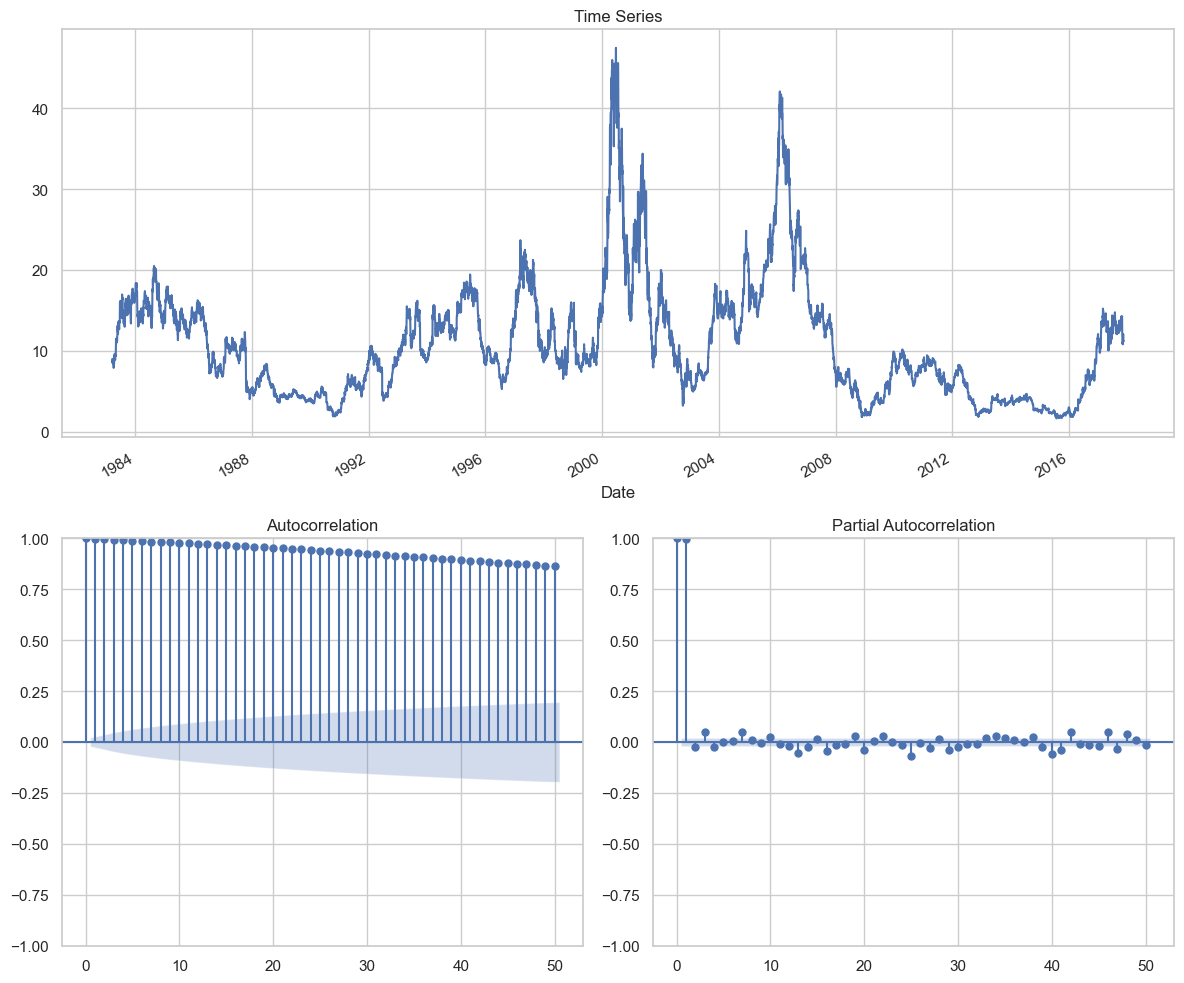

In [71]:
# Display plot of close column and Date index
plotds(df_AMD_stocks['Close'], nlag = 50)

In [79]:
# Calculate the mean value of first 125 rows and afterwards
mean1, mean2 = df_AMD_stocks.iloc[:125].Close.mean(), df_AMD_stocks.iloc[125:].Close.mean()

# Calculate the variance value of first 125 rows and afterwards
var1, var2 = df_AMD_stocks.iloc[:125].Close.var(), df_AMD_stocks.iloc[125:].Close.var()

# Display mean and variance of two parts of the time series
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 12.771120, mean2 = 10.800609
variance1 = 7.077579, variance2 = 52.266534


In [80]:
from statsmodels.tsa.stattools import adfuller

# Call adfuller() function to calculate the values
adf_result = adfuller(df_AMD_stocks.Close.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -3.712832
p-value: 0.003936


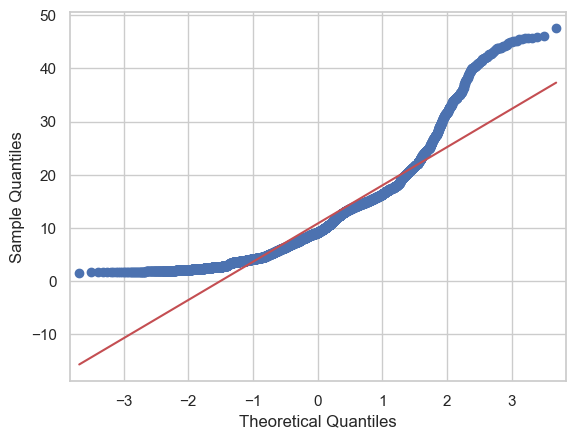

In [81]:
# qqplot for the 'Close' column
x = sm.qqplot(df_AMD_stocks['Close'], line = 's')

In [82]:
from statsmodels.tsa.arima.model import ARIMA

# Call ARIMA function to train the model on the 'Close' price
model = ARIMA(df_AMD_stocks['Close'], order = (1, 1, 0))# p, d, q

# Train ARIMA Model on the 'Close' price dataset
results_AR = model.fit()

In [83]:
# Store one difference value of the 'Close' column / In here we change the data for stationary
first_order_diff = df_AMD_stocks['Close'].diff(1)

# Display the first five records
df_AMD_stocks['Close'].head(), first_order_diff.head()

(Date
 1983-03-21    9.00
 1983-03-22    8.50
 1983-03-23    8.72
 1983-03-24    8.78
 1983-03-25    8.88
 Name: Close, dtype: float64,
 Date
 1983-03-21     NaN
 1983-03-22   -0.50
 1983-03-23    0.22
 1983-03-24    0.06
 1983-03-25    0.10
 Name: Close, dtype: float64)

In [84]:
# Drop the first row of 'Close' column because It has 'NaN' value
first_order_diff = df_AMD_stocks['Close'].diff(1).dropna()

# Display the first five records
first_order_diff.head()

Date
1983-03-22   -0.50
1983-03-23    0.22
1983-03-24    0.06
1983-03-25    0.10
1983-03-28   -0.19
Name: Close, dtype: float64

Text(0.5, 1.0, 'First-order differences of AMD Stocks during March 1983 to Nov 2017')

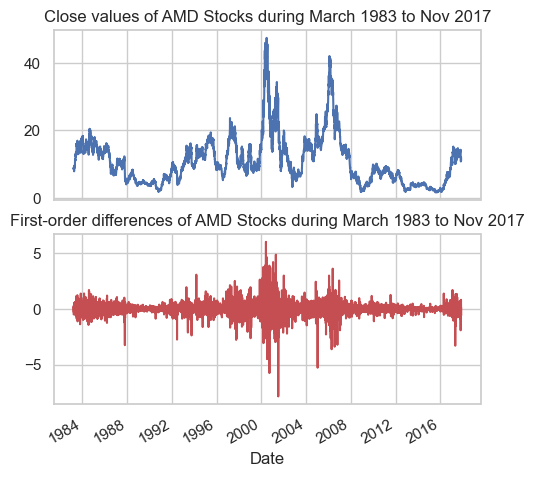

In [106]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
df_AMD_stocks['Close'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of AMD Stocks during March 1983 to Nov 2017')
first_order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences of AMD Stocks during March 1983 to Nov 2017')

ADF Statistic: -14.224775
p-value: 0.000000


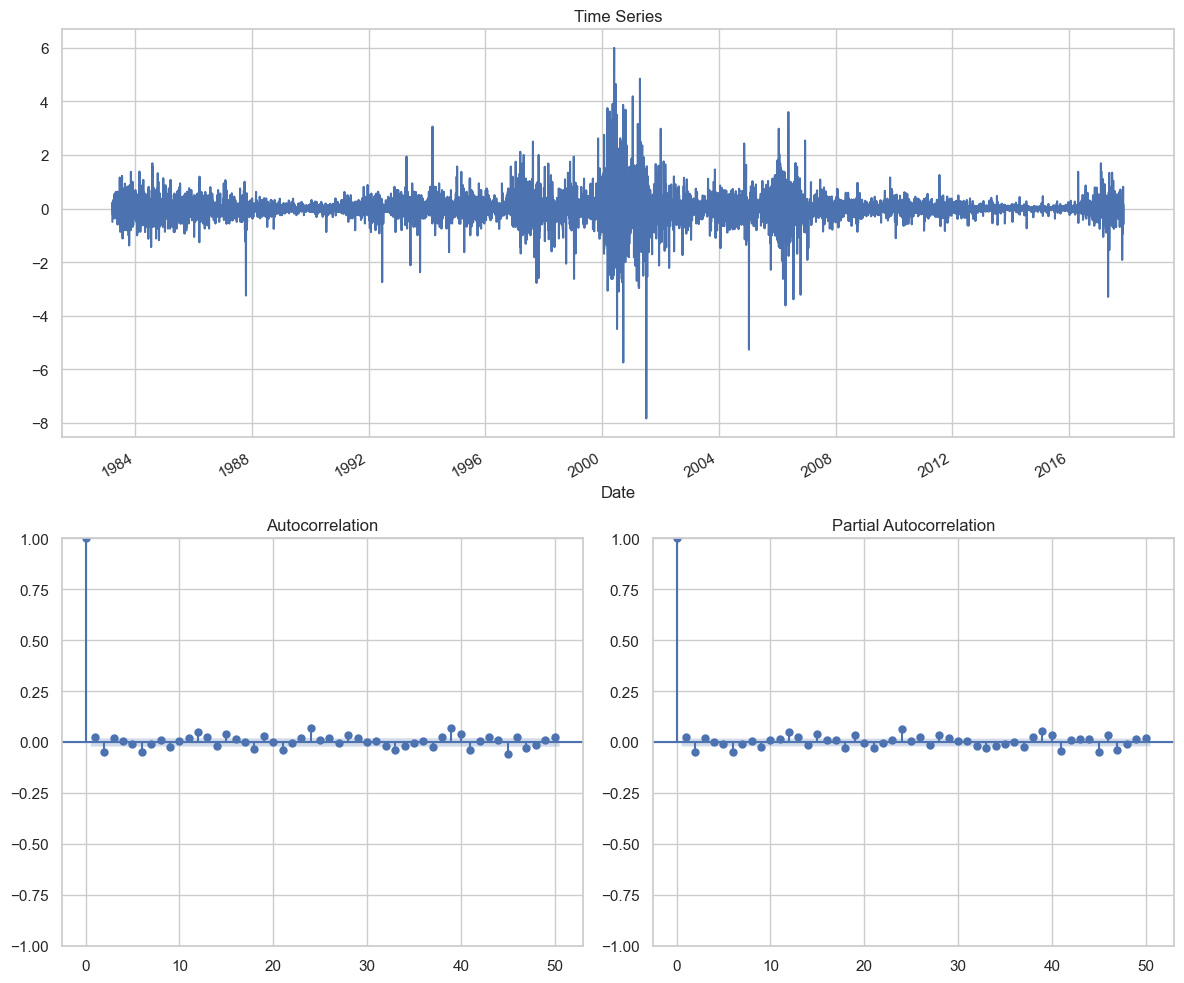

In [87]:
# plot the data with 50 lags
plotds(first_order_diff, nlag = 50)

# Perform Dicky Fuller test
adf_result = adfuller(first_order_diff)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

In [88]:
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(df_AMD_stocks['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, 12777.950158819225], [0, 1, 1, 12774.91080924163], [0, 1, 2, 12755.655191497863], [1, 1, 0, 12775.406318322142], [1, 1, 1, 12759.845129784124], [1, 1, 2, 12754.964993582973], [2, 1, 0, 12756.454644224279], [2, 1, 1, 12754.931173594168], [2, 1, 2, 12757.182280841274], [0, 2, 0, 18630.089773065454], [0, 2, 1, 12788.791510100096], [0, 2, 2, 12785.53167015555], [1, 2, 0, 16519.19724151802], [1, 2, 1, 12785.97610773614], [1, 2, 2, 12770.418000143065], [2, 2, 0, 15281.658221087604], [2, 2, 1, 12767.119506734818], [2, 2, 2, 12788.575053478575]]


In [100]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(df_AMD_stocks['Close'].tolist(), order = (2, 1, 1))

# d = 1, the number of times that the raw observations are differenced, also called the degree of differencing.

# Train the ARIMA model by calling a method fit()
arima_obj_fit = arima_obj.fit()

# disp : int, optional
# If True, convergence information is printed.  For the default l_bfgs_b solver, disp controls the frequency of the output 
# during the iterations. disp < 0 means no output in this case.

# Display the summary of the trained model
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8737
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -6373.466
Date:                Mon, 30 Oct 2023   AIC                          12754.931
Time:                        21:00:23   BIC                          12783.232
Sample:                             0   HQIC                         12764.576
                               - 8737                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3561      0.081     -4.370      0.000      -0.516      -0.196
ar.L2         -0.0402      0.006     -6.575      0.000      -0.052      -0.028
ma.L1          0.3811      0.082      4.640      0.000       0.220       0.542
sigma2         0.2519      0.001    233.689      0.000       0.250       0.254
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            215617.52
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
# Declare the array 'pred' and append the values 
pred = arima_obj_fit.fittedvalues

# Add a new column 'ARIMA' into dataframe
df_AMD_stocks['ARIMA'] = pred

# Residues and fitted values are added and stored into dataframe
diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues

# Add a column 'diffval' into dataframe
df_AMD_stocks['diffval'] = diffval

# Display first five records
df_AMD_stocks.head()

,Open,High,Low,Close,Volume,OpenInt,Ticker,Name,ARIMA,diffval
Date,,,,,,,,,,
1983-03-21,8.97,9.03,8.81,9.00,528000,0,AMD,ADVANCED MICRO DEVICES INC,0.000000,9.00
1983-03-22,8.72,8.97,8.50,8.50,332400,0,AMD,ADVANCED MICRO DEVICES INC,9.000000,8.50
1983-03-23,8.50,8.81,8.47,8.72,442400,0,AMD,ADVANCED MICRO DEVICES INC,8.488608,8.72
1983-03-24,8.72,8.78,8.66,8.78,412000,0,AMD,ADVANCED MICRO DEVICES INC,8.749700,8.78
1983-03-25,8.91,9.06,8.75,8.88,216400,0,AMD,ADVANCED MICRO DEVICES INC,8.761325,8.88


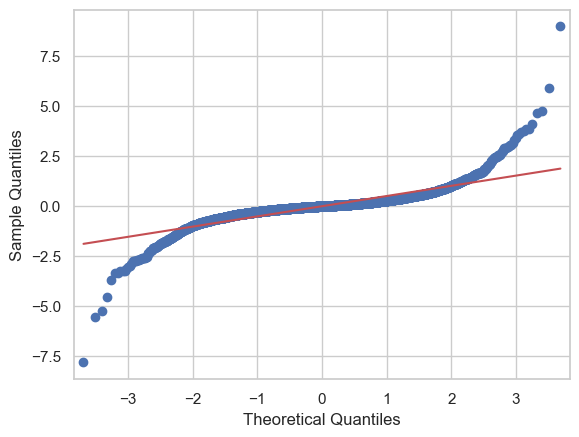

In [102]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
# Call qqplot() for arima_obj_fit
x = sm.qqplot(arima_obj_fit.resid, line = 's')

In [103]:
print(df_AMD_stocks['diffval'], df_AMD_stocks['ARIMA'])

Date
1983-03-21     9.00
1983-03-22     8.50
1983-03-23     8.72
1983-03-24     8.78
1983-03-25     8.88
              ...  
2017-11-06    11.93
2017-11-07    12.05
2017-11-08    11.71
2017-11-09    11.12
2017-11-10    11.26
Name: diffval, Length: 8737, dtype: float64 Date
1983-03-21     0.000000
1983-03-22     9.000000
1983-03-23     8.488608
1983-03-24     8.749700
1983-03-25     8.761325
                ...    
2017-11-06    11.117782
2017-11-07    11.940204
2017-11-08    12.016524
2017-11-09    11.709443
2017-11-10    11.119161
Name: ARIMA, Length: 8737, dtype: float64


Text(0, 0.5, 'Closing')

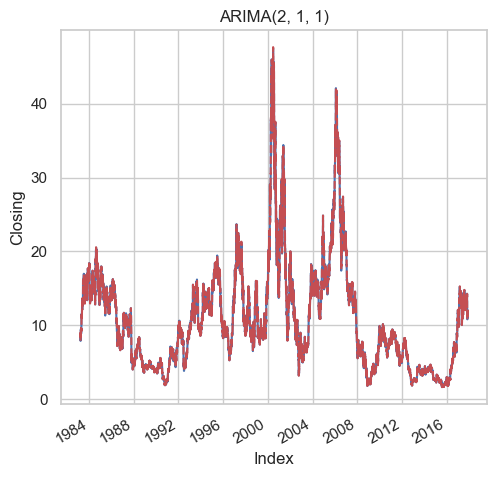

In [108]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)

# Ignore first one rows because of difference factor d = 1
df_AMD_stocks['diffval'].iloc[1:].plot(color = 'b', linestyle = '-', ax = axarr)
df_AMD_stocks['ARIMA'].iloc[1:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(2, 1, 1)')
plt.xlabel('Index')
plt.ylabel('Closing')

In [105]:
result = arima_obj_fit.get_forecast()
forecast = result.predicted_mean

# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0,0], ci[0,1]))

80.0% Confidence Interval: 11.288 between 10.644 and 11.931
90.0% Confidence Interval: 11.288 between 10.462 and 12.113
95.0% Confidence Interval: 11.288 between 10.304 and 12.271
99.0% Confidence Interval: 11.288 between 9.995 and 12.580
